<a href="https://colab.research.google.com/github/taruvaid/Fourier-Neural-Operators/blob/main/pytorch_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pytorch
Deep learning primitives, neural network depth/width, activation functions and optimizers etc.

Autograd - automatic differentiation engine that enables backward pass of your model to be done through a single function call

Tools to work at scale - TorchScript (serializable/optimizatble models), TorchServe (model serving solution),quantization

Associated libraries/data for computer vision, audio and text data (Ex. torchvision etc.)

Pytorch is written in C++

Strong online/open source community


In [ ]:

import torch
import numpy as np
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

**Tensors (multidimensional array)**

In [ ]:
#Tensors are essentially multidimensional arrays (matrices)
z = torch.zeros([5,3]) # torch tensor
z_np = np.zeros([5,3]) # numpy array

print(z)
print(z.dtype)
print(z_np.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
torch.float32
float64


In [ ]:
z_int = torch.ones((2,3),dtype = int) #overriding default datatype to integer
print(z_int)

tensor([[1, 1, 1],
        [1, 1, 1]])


In [ ]:
# Seeding and pytorch's random number generator (PRND)

torch.manual_seed(2025)
z1 = torch.rand(2,3)
print("First random tensor")
print(z1)

z2 = torch.rand(2,3)
print("\nSecond random tensor (will be different from z1 because seed was not specified)")
print(z2)

#repeats value because of re-seed
torch.manual_seed(2025)
z3 = torch.rand(2,3)
print("\nThird random tensor (should match first one)")
print(z3)



First random tensor
tensor([[0.6850, 0.9355, 0.2900],
        [0.3991, 0.7470, 0.0215]])

Second random tensor (will be different from z1 because seed was not specified)
tensor([[0.0654, 0.7855, 0.3883],
        [0.6340, 0.9447, 0.4773]])

Third random tensor (should match first one)
tensor([[0.6850, 0.9355, 0.2900],
        [0.3991, 0.7470, 0.0215]])


Further Reading -

Pytorch Quick Tip: Reproducible Results and Deterministic Behavior : https://youtu.be/1SZocGaCAr8?feature=shared

https://docs.pytorch.org/docs/stable/notes/randomness.html

In [ ]:
# Mathematical operations using Tensors

tensor_1 = torch.rand (2,4) # tensor of random numbers from a uniform distribution on the interval [0,1)
tensor_2 = torch.rand (2,4)

# Addition happens elementwise. Both tensors must be of the same shape
tensor_add = tensor_1 + tensor_2

# Scalar multiplication happens elementwise
tensor_sm = tensor_1*10


print ("Tensor 1 :")
print(tensor_1)
print ("\nTensor 2 :")
print (tensor_2)
print ("\nTensor addition :")
print(tensor_add)
print ("\nScalar multiplication :")
print(tensor_sm)



Tensor 1 :
tensor([[0.6045, 0.9205, 0.1994, 0.4573],
        [0.9114, 0.3792, 0.2024, 0.4636]])

Tensor 2 :
tensor([[0.2031, 0.0702, 0.0649, 0.0324],
        [0.4256, 0.6001, 0.9934, 0.1961]])

Tensor addition :
tensor([[0.8076, 0.9907, 0.2643, 0.4897],
        [1.3371, 0.9793, 1.1958, 0.6597]])

Scalar multiplication :
tensor([[6.0447, 9.2050, 1.9937, 4.5725],
        [9.1143, 3.7924, 2.0243, 4.6360]])


In [ ]:
#Mathematical operations are available in pytorch...

r = (torch.rand(2,2)-0.5)*2 #random values between -1 and 1
print ("\nOriginal tensor :")
print(r)

# Absolute value
print ("\nAbsolute value :")
print(torch.abs(r))

print ("\nTrignometric functions :")
# Trignometric functions
print(torch.sin(r))

# Averages
print ("\nAverage value :")
print(torch.mean(r))

# Standard deviation and mean together
print ("\nStandard deviation with mean :")
print(torch.std_mean(r))

# Max and min
print ("\nMax & Min :")
print(torch.max(r))
print(torch.min(r))

# Determinant of a matrix
print ("\nDeterminants :")
print(torch.det(r))

# Matrix transpose
print ("\nMatrix transpose :")
print(torch.t(r))
# Singular value decomposition (Eigendecomposition)
print ("\nSingular value decomposition :")
print(torch.svd(r))


Original tensor :
tensor([[ 0.9170, -0.0254],
        [-0.6485, -0.2652]])

Absolute value :
tensor([[0.9170, 0.0254],
        [0.6485, 0.2652]])

Trignometric functions :
tensor([[ 0.7938, -0.0254],
        [-0.6040, -0.2621]])

Average value :
tensor(-0.0055)

Standard deviation with mean :
(tensor(0.6664), tensor(-0.0055))

Max & Min :
tensor(0.9170)
tensor(-0.6485)

Determinants :
tensor(-0.2596)

Matrix transpose :
tensor([[ 0.9170, -0.6485],
        [-0.0254, -0.2652]])

Singular value decomposition :
torch.return_types.svd(
U=tensor([[-0.8018,  0.5976],
        [ 0.5976,  0.8018]]),
S=tensor([1.1312, 0.2295]),
V=tensor([[-0.9925,  0.1221],
        [-0.1221, -0.9925]]))


In [ ]:
## Basic convolutional neural network
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0564,  0.0527,  0.0010,  0.0387,  0.0135, -0.0837,  0.0166, -0.1310,
          0.0821,  0.0895]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [ ]:
# Datasets
import torchvision
import torchvision.transforms as transforms #transforms for images to make them ready for ingestion by our pytorch models

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), #converts images loaded into PyTorch tensors
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) #Normalize adjusts value of tensors for a specific mean and standard deviation

Besides the above, there are many transformations available and see documentation linked below for more

https://docs.pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py



In [ ]:
# Creating an instance of the CIFAR10 dataset.
# This is a set of 32x32 color image tiles representing 10 classes of objects
# 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck
# https://www.cs.toronto.edu/~kriz/cifar.html

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


100%|██████████| 170M/170M [00:03<00:00, 43.2MB/s]


`Dataset` classes in PyTorch include the downloadable datasets in TorchVision, Torchtext, and TorchAudio, as well as utility dataset classes such as `torchvision.datasets.ImageFolder`, which will read a folder of labeled images.

We can also create your own subclasses of `Dataset`.

When we instantiate our dataset, we need to tell it a few things:
* The filesystem path to where we want the data to go
* Whether or not we are using this set for training; most datasets will be split into training and test subsets.
* Whether we would like to download the dataset if we haven't already
* The transformations we want to apply to the data

 Once the dataset is ready, we give it to the `DataLoader'

In [ ]:
# DataLoader feeds batches of data to the model
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)



A `Dataset` subclass wraps access to the data, and is specialized to the type of data it's serving.

The `DataLoader` knows *nothing* about the data, but organizes the input tensors served by the `Dataset` into batches with the parameters you specify.

In the example above, we've asked a `DataLoader` to give us batches of 4 images from `trainset`, randomizing their order (`shuffle=True`).

Additionally, we spin up two workers to load data from disk.

 deer  bird   dog truck


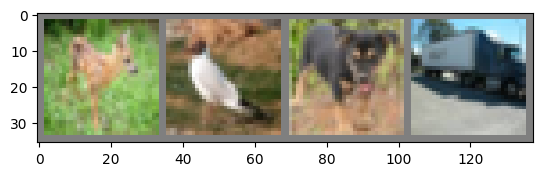

In [ ]:
# It's good practice to visualize the batches your `DataLoader` serves...

import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Training a model**

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  cat  frog plane  bird


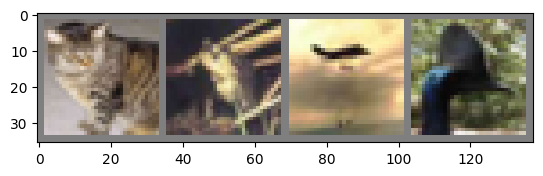

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The loss function, is a measure of how far from our ideal output the model's prediction was. Cross-entropy loss is a typical loss function for classification models like ours.

The **optimizer** is what drives the learning. Here we created an optimizer that implements *stochastic gradient descent,* one of the more straightforward optimization algorithms. Besides parameters of the algorithm, like the learning rate (`lr`) and momentum, we also pass in `net.parameters()`, which is a collection of all the learning weights in the model - which is what the optimizer adjusts.

Finally, all of this is assembled into the training loop.

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.182
[1,  4000] loss: 1.857
[1,  6000] loss: 1.664
[1,  8000] loss: 1.577
[1, 10000] loss: 1.520
[1, 12000] loss: 1.445
[2,  2000] loss: 1.411
[2,  4000] loss: 1.363
[2,  6000] loss: 1.344
[2,  8000] loss: 1.329
[2, 10000] loss: 1.302
[2, 12000] loss: 1.289
Finished Training


Here, we are doing only **2 training epochs** (line 1) - that is, two passes over the training dataset. Each pass has an inner loop that **iterates over the training data** (line 4), serving batches of transformed input images and their correct labels.

**Zeroing the gradients** (line 9) is an important step. Gradients are accumulated over a batch; if we do not reset them for every batch, they will keep accumulating, which will provide incorrect gradient values, making learning impossible.

In line 12, we **ask the model for its predictions** on this batch. In the following line (13), we compute the loss - the difference between `outputs` (the model prediction) and `labels` (the correct output).

In line 14, we do the `backward()` pass, and calculate the gradients that will direct the learning.

In line 15, the optimizer performs one learning step - it uses the gradients from the `backward()` call to nudge the learning weights in the direction it thinks will reduce the loss.

The remainder of the loop does some light reporting on the epoch number, how many training instances have been completed, and what the collected loss is over the training loop.

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html


**Tensors deep dive**

In [ ]:
## Autograd (backpropagation)
## Torchscript and torch.jit.load (just in time complier)